In [1]:
import sys; sys.path.insert(0, '.')
import visual
visual.display_meta_info()


| Meta          | Value          |
|:------------- | --------------:|
| Git revision  | 0d4481d |
| System        | Linux (5.16.12-200.fc35.x86_64)           |
| Processor     | Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz          |
| Memory        | 16 GB          |


***Mean over 10 invocations.***

| malloc | description |
|:--- |:--- |
|**sys**|System alloctor|
|**mi**|MiMalloc|
|**hd**|Hoard|
|**hoard**|Hoard (MallocKit)|
|**buddy**|Buddy allocator (MallocKit)|


---

# Normalized Time:

malloc,sys,mi,hd,hoard,buddy
bench,,,,,
alloc-test,1.204164,0.951836,1.0,1.070833,1.186361
alloc-test1,1.181552,0.945142,1.0,1.061614,1.139037
barnes,0.993797,0.993273,1.0,0.992719,0.994529
cache-scratch,0.999386,1.000798,1.0,0.999841,1.000166
cache-scratch1,0.99441,0.995488,1.0,0.999684,0.997845
cfrac,1.050397,0.970247,1.0,1.012779,1.176428
espresso,1.114004,0.982692,1.0,0.99785,1.313622
glibc-simple,2.023627,0.922979,1.0,1.07948,2.120299
glibc-thread,0.999335,0.999389,1.0,0.99941,0.999531


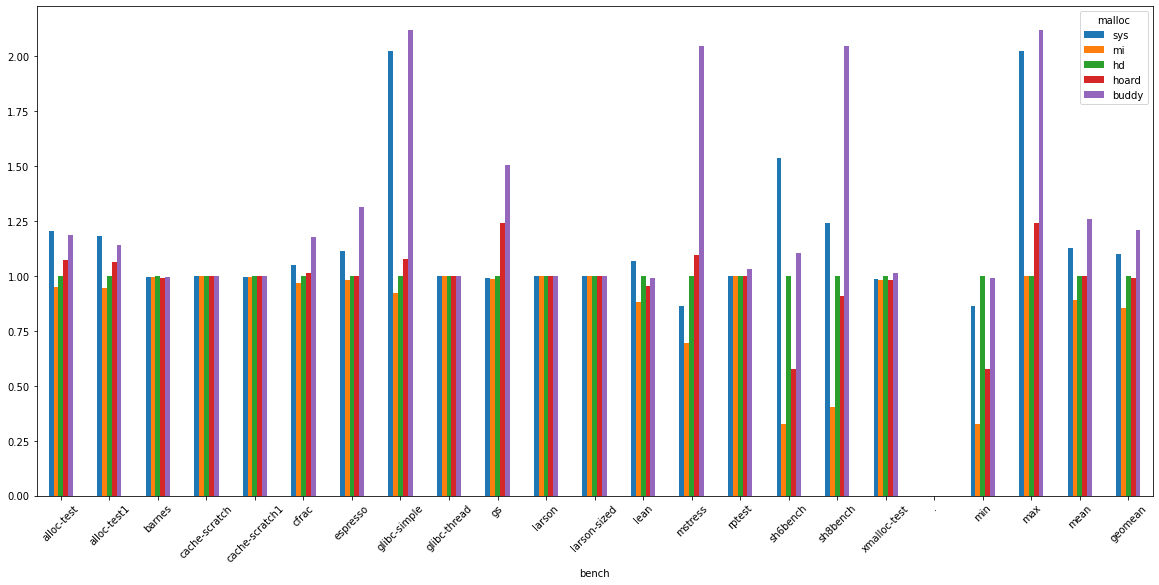

In [2]:
from visual import Pipeline

data = Pipeline.load_results()
data, invocations = Pipeline.mean_over_invocation(data)
data = Pipeline.normalize(data, baseline = 'hd')
data = Pipeline.plot_bar(data, series='malloc', pivot='bench', value='duration_time', column_order = ['sys', 'mi', 'hd', 'hoard', 'buddy'])

visual.markdown(f'***Mean over {invocations} invocations.***')
algorithms = '| malloc | description |\n|:--- |:--- |\n'
for a in data.columns.values:
    if a == 'buddy': algorithms += f'|**{a}**|Buddy allocator (MallocKit)|\n'
    elif a == 'hd': algorithms += f'|**{a}**|Hoard|\n'
    elif a == 'hoard': algorithms += f'|**{a}**|Hoard (MallocKit)|\n'
    elif a == 'mi': algorithms += f'|**{a}**|MiMalloc|\n'
    elif a == 'sys': algorithms += f'|**{a}**|System alloctor|\n'
visual.markdown(algorithms)
visual.markdown('---\n\n# Normalized Time:')

data